<a href="https://colab.research.google.com/github/HENRIQUEDEV04/DATAWAREHOUSE-AND-DATALAKE/blob/main/Datawarehouse_e_Datalake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#
num_produtos = 600
produtos = {
    'produto_id':range(1, num_produtos + 1),
    'nome': [f'Produto {i}' for i in range(1, num_produtos + 1)],
    'categoria': np.random.choice(['Eletrônicos', 'Roupas', 'Alimentos'], num_produtos)

}

#
df_produtos = pd.DataFrame(produtos)

#
num_vendas = 1000 #
data_vendas = {
    'data': np.random.choice(pd.date_range('2024-04-01', periods=30), num_vendas),
    'produto_id': np.random.randint(1, num_produtos + 1, num_vendas),
    'quantidade': np.random.randint(50, 200, num_vendas), #
    'valor_total': np.random.randint(1000,10000, num_vendas) #
}

#
df_vendas = pd.DataFrame(data_vendas)

#
df_vendas.to_csv('vendas.csv', index=False)
df_produtos.to_csv('produtos.csv', index=False)

#
df_vendas = pd.read_csv('vendas.csv')
df_produtos = pd.read_csv('produtos.csv')

#
df_merge = pd.merge(df_vendas, df_produtos, on='produto_id', how='inner')

#
df_merge.to_csv('data_warehouse.csv', index=False)

#
df_warehouse = pd.read_csv('data_warehouse.csv')
print("Conteúdo do Data Warehouse:")
print(df_warehouse)



Conteúdo do Data Warehouse:
           data  produto_id  quantidade  valor_total         nome    categoria
0    2024-04-01         289         121         5624  Produto 289    Alimentos
1    2024-04-13         289         128         9603  Produto 289    Alimentos
2    2024-04-01         289         174         6351  Produto 289    Alimentos
3    2024-04-12         289          50         7851  Produto 289    Alimentos
4    2024-04-30         115         197         9131  Produto 115       Roupas
..          ...         ...         ...          ...          ...          ...
995  2024-04-10         332         135         8430  Produto 332  Eletrônicos
996  2024-04-06         319         190         8799  Produto 319  Eletrônicos
997  2024-04-29         441         156         5120  Produto 441       Roupas
998  2024-04-29         318          51         7521  Produto 318    Alimentos
999  2024-04-24         194          92         9466  Produto 194    Alimentos

[1000 rows x 6 columns]

Análise de vendas por produto:
             quantidade  valor_total
nome                                
Produto 1           449        10127
Produto 10          420        24564
Produto 100         154         7760
Produto 101         616        26125
Produto 102          99         7863
...                 ...          ...
Produto 94          533        27406
Produto 95          147         3449
Produto 96          306        16159
Produto 98          146         5918
Produto 99          301        16287

[501 rows x 2 columns]

Análise de vendas por categoria de produto:
             quantidade  valor_total
categoria                           
Alimentos         44412      2038715
Eletrônicos       40703      1876681
Roupas            39027      1826586

Análise de tendências temporais:
            quantidade  valor_total
data                               
2024-04-01        5069       234592
2024-04-02        3084       150000
2024-04-03        4006       174428
2024-04-04        25

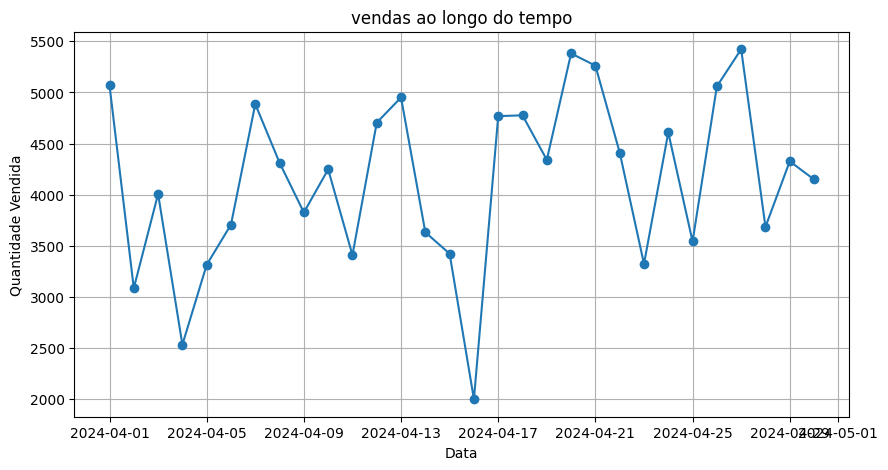


Análise de desempenho de produtos:
nome
Produto 1      10127
Produto 10     24564
Produto 100     7760
Produto 101    26125
Produto 102     7863
               ...  
Produto 94     27406
Produto 95      3449
Produto 96     16159
Produto 98      5918
Produto 99     16287
Name: valor_total, Length: 501, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#
df_warehouse = pd.read_csv('data_warehouse.csv')

#
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade', 'valor_total']].sum()
print("Análise de vendas por produto:")
print(vendas_por_produto)

#
vendas_por_categoria = df_warehouse.groupby('categoria') [['quantidade', 'valor_total']].sum()
print("\nAnálise de vendas por categoria de produto:")
print(vendas_por_categoria)

#
df_warehouse['data'] = pd.to_datetime(df_warehouse ['data'])
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']].sum()
print("\nAnálise de tendências temporais:")
print(vendas_por_data)

#
plt.figure(figsize=(10, 5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker='o', linestyle='-')
plt.title('vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.show()

#
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()
print("\nAnálise de desempenho de produtos:")
print(desempenho_produto)


In [ ]:
import pandas as pd
import numpy as np
import os


#
if not os.path.exists('data_lake'):
  os.makedirs('data_lake')

#
num_files = 10
num_rows_per_file = 1000

#
dfs = []

#
for i in range(num_files):
  #
  data = {
      'coluna1': np.random.randint(0,100, num_rows_per_file),
      'coluna2': np.random.randn(num_rows_per_file),
      'coluna3': np.random.choice(['A', 'B', 'C'], num_rows_per_file)
  }

#
df = pd.DataFrame(data)

#
file_name = f'data_lake/dados_{i+1}.csv'
df.to_csv(file_name, index=False)

#
dfs.append((file_name, df))

print("Dados do Data Lake gerados com sucesso!")

#
for file_name, df in dfs:
  print(f"\nDados do arquivo: {file_name}\n")
  print(df.head())


Dados do Data Lake gerados com sucesso!

Dados do arquivo: data_lake/dados_10.csv

   coluna1   coluna2 coluna3
0       72  0.746965       C
1       10 -1.011751       A
2        6  0.179445       C
3       45 -0.814000       C
4       42  0.349886       B


Dados do Data Lake gerados com sucesso!
Primeiras linhas do DataFrame:
   coluna1   coluna2 coluna3
0       84  0.518998       A
1       92  2.191981       A
2        4  0.632610       B
3       89 -0.726987       B
4       18  0.030460       B

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coluna1  1000 non-null   int64  
 1   coluna2  1000 non-null   float64
 2   coluna3  1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None

Resumo estatístico do DataFrame:
           coluna1      coluna2
count  1000.000000  1000.000000
mean     49.283000     0.015442
std      29.194575     0.991407
min       0.000000    -3.777745
25%      24.000000    -0.691646
50%      49.000000     0.018201
75%      75.000000     0.686716
max      99.000000     3.260864


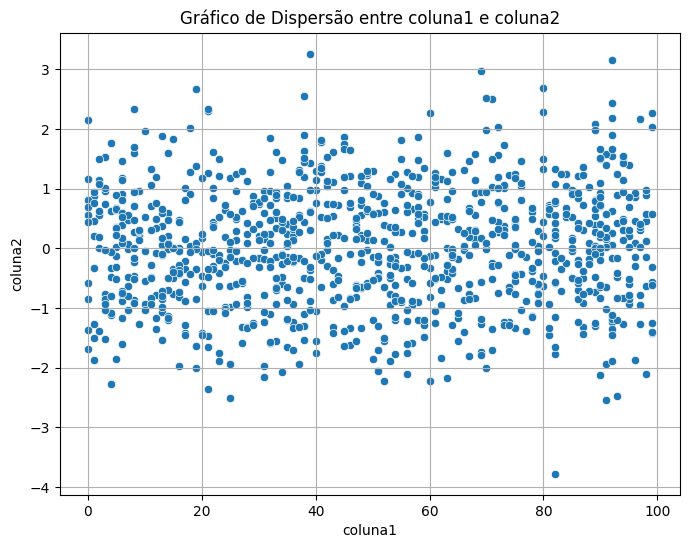

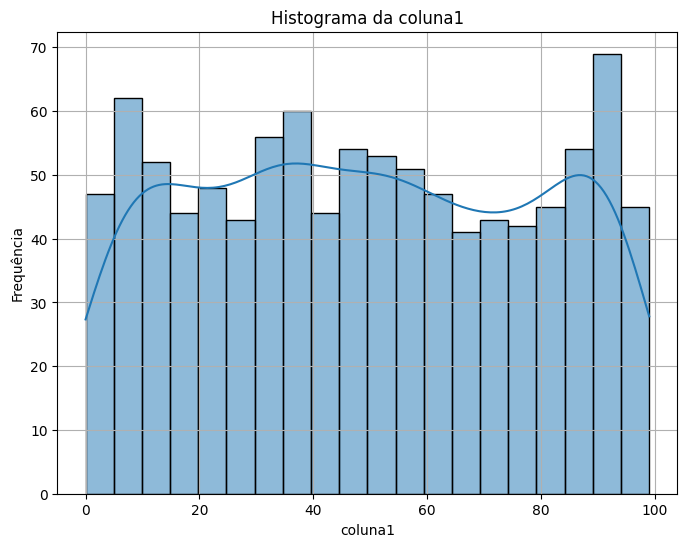

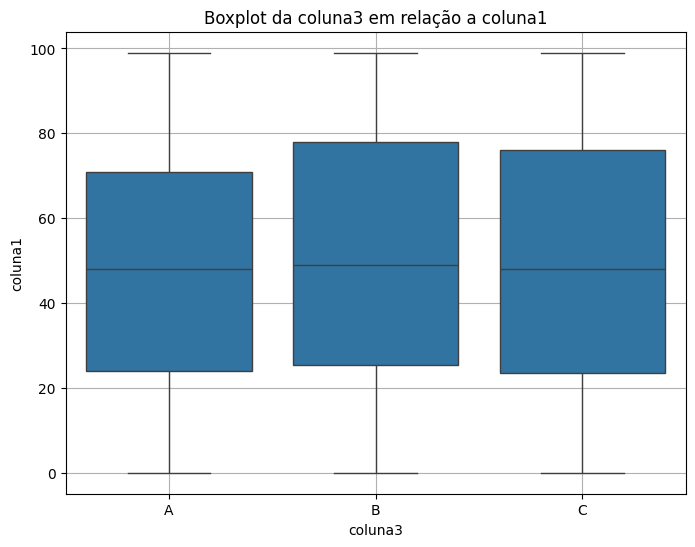

In [13]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

#
if not os.path.exists('data_lake'):
  os.makedirs('data_lake')

#
num_files = 10
num_rows_per_file = 1000

#
dfs = []

#
for i in range(num_files):
  #
  data = {
      'coluna1': np.random.randint(0, 100, num_rows_per_file),
      'coluna2': np.random.randn(num_rows_per_file),
      'coluna3': np.random.choice(['A', 'B', 'C'], num_rows_per_life)
  }

#
df = pd.DataFrame(data)

#
file_name = f'data_lake/dados_{i+1}.csv'
df.to_csv(file_name, index=False)

#
dfs.append(df)

print("Dados do Data Lake gerados com sucesso!")

#
conn_string = 'sqlite:///data_lake.db'

#
engine = create_engine(conn_string)

#
for i, df in enumerate(dfs, 1):
  table_name = f'dados_{i}'
  df.to_sql(table_name, engine, index=False)




# Criar uma conexão com o banco de dados SQLite
conn_string = 'sqlite:///data_lake.db'

#
engine = create_engine(conn_string)

# Carregar dados do banco de dados para um DataFrame
table_name = 'dados_1'
df = pd.read_sql_table(table_name, engine)

# Imprimir as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame:")
print(df.head())

# Imprimir informações sobre o DataFrame, incluindo tipo de dados e memória usada
print("\nInformações sobre o DataFrame:")
print(df.info())

# Imprimir um resumo estatístico do DataFrame, incluindo média, desvio padrão, mínimo, máximo, etc.
print("\nResumo estatístico do DataFrame:")
print(df.describe())

# Criar um gráfico de dispersão usando as colunas 'coluna1' e 'coluna2' do DataFrame
plt.figure(figsize=(8,6))
sns.scatterplot(x='coluna1', y='coluna2', data=df)
plt.title("Gráfico de Dispersão entre coluna1 e coluna2")
plt.xlabel('coluna1')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()

# Criar um histograma da coluna 'coluna1' com 20 bins e KDE (Kernel Density Estimation)
plt.figure(figsize=(8,6))
sns.histplot(df['coluna1'], bins=20, kde=True)
plt.title('Histograma da coluna1')
plt.xlabel('coluna1')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Criar um boxplot da coluna 'coluna3' em relação à coluna 'coluna1'
plt.figure(figsize=(8,6))
sns.boxplot(x='coluna3', y='coluna1', data=df)
plt.title('Boxplot da coluna3 em relação a coluna1')
plt.xlabel('coluna3')
plt.ylabel('coluna1')
plt.grid(True)
plt.show()